<a href="https://colab.research.google.com/github/mayanku1111/AnimagineXL_diffusion/blob/main/Animagine_XL_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Install Library**

In [ ]:
!pip install -q --upgrade diffusers invisible_watermark transformers accelerate safetensors

### **Run pipeline**

In [ ]:
import torch
from torch import autocast
from diffusers import StableDiffusionXLPipeline, EulerAncestralDiscreteScheduler

model = "linaqruf/animagine-xl"

pipe = StableDiffusionXLPipeline.from_pretrained(
    model,
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
    )
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.to('cuda')


### **Generate**

  0%|          | 0/50 [00:00<?, ?it/s]

(-0.5, 1023.5, 1023.5, -0.5)

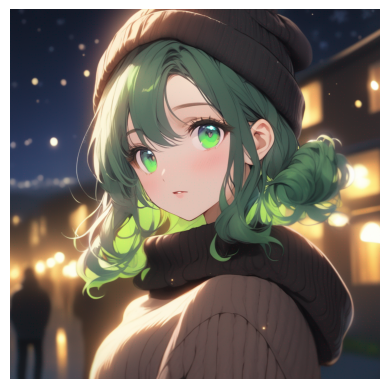

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

prompt = "face focus, cute, masterpiece, best quality, 1girl, green hair, sweater, looking at viewer, upper body, beanie, outdoors, night, turtleneck"
negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
output = "/content/anime_girl.png"

image = pipe(
    prompt,
    negative_prompt=negative_prompt,
    width=1024,
    height=1024,
    guidance_scale=12,
    target_size=(1024,1024),
    original_size=(4096,4096),
    num_inference_steps=50
    ).images[0]

image.save(output)
image = Image.open(output)
plt.imshow(image)
plt.axis('off') # to hide the axis



### **Clean Memory**

In [ ]:
import gc

if "pipe" in globals():
    del pipe
if "image" in globals():
    del image
torch.cuda.empty_cache()
gc.collect()